<a href="https://colab.research.google.com/github/MANSUsra/Projet-ML/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importation des bibliotheques**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# **Analyse des données du dataset**

# Affichage des données

In [6]:
df=pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Creation d'un graphique figurant le nombre des étudiants en fonction de la consommation de l'alcool

Text(0.5, 0, "la consommation de l'alcool par semaine")

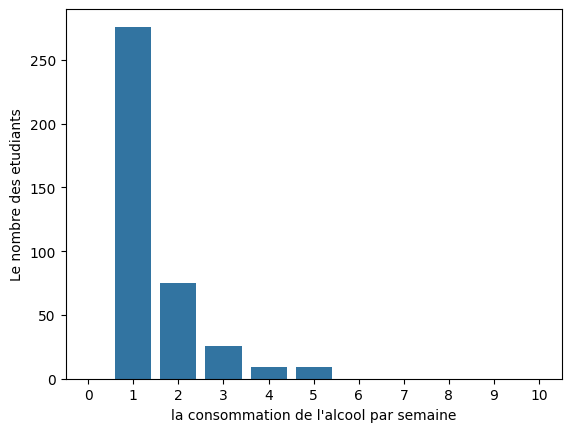

In [7]:
list = []
for i in range(11):
    list.append(len(df[df.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Le nombre des etudiants')
plt.xlabel("la consommation de l'alcool par semaine")

La consommation hebdomadaire d'alcool la plus fréquente parmi les étudiants est de consommer de l'alcool une fois par semaine. Cela indique que la majorité des étudiants ont tendance à limiter leur consommation à une fréquence hebdomadaire plutôt que de consommer de l'alcool plus souvent.

# Creation d'un graphe figurant la moyenne de la note G1 (First Period Grade) en fonction de goout

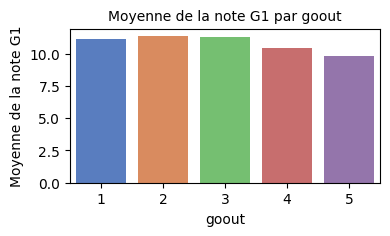

In [8]:
G1_goout = df.groupby('goout')['G1'].mean().reset_index()

plt.figure(figsize=(4,2))
sns.barplot(x='goout', y='G1', data=G1_goout, hue='goout', palette='muted', dodge=False, legend=False)

plt.title('Moyenne de la note G1 par goout', fontsize=10)
plt.xlabel('goout', fontsize=10)
plt.ylabel('Moyenne de la note G1', fontsize=10)

plt.show()

Pour les étudiants ayant un nombre élevé de sorties (goout = 5), la moyenne de leur note G1 est inférieure par rapport à ceux ayant des niveaux de sorties inférieurs.

# Creation d'un graphe pour visualiser quelques facteurs

<ipython-input-9-d519622b9fcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2_r')
<ipython-input-9-d519622b9fcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2_r')
<ipython-input-9-d519622b9fcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2_r')
<ipython-input-9-d519622b9fcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

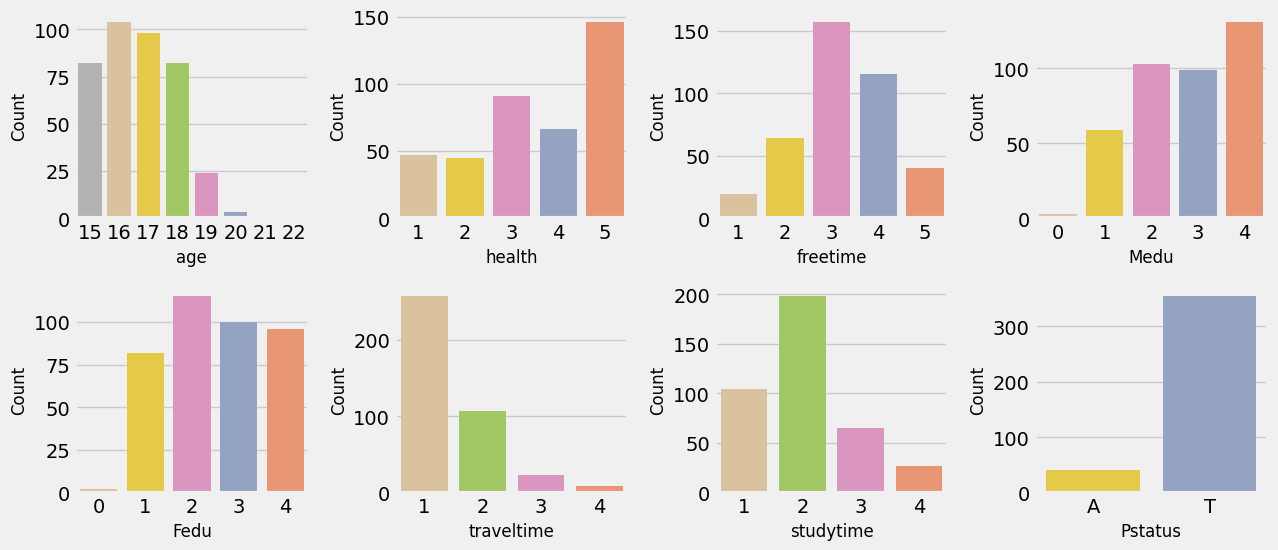

In [9]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(13, 8))

cols = ['age', 'health', 'freetime', 'Medu', 'Fedu', 'traveltime', 'studytime','Pstatus']

for i, col in enumerate(cols):
    fig.add_subplot(3, 4, i+1)
    sns.countplot(x=col, data=df, palette='Set2_r')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()

plt.show()

**Conclusion**

**La tranche d'âge** la plus courante parmi les élèves se situe entre 15 et 18 ans. De plus, il semble que la plupart de ces élèves disposent de **temps libre** en dehors des cours.

En ce qui concerne **la santé**, il semble que la plupart des élèves bénéficient d'un niveau de santé assez bon.

En ce qui concerne **le niveau d'éducation des parents**, on remarque que très peu de parents n'ont pas d'éducation scolaire, tandis qu'une grande majorité a une éducation secondaire ou universitaire.

En ce qui concerne **le temps de trajet** pour se rendre à l'école, la plupart des élèves ont un temps de trajet bas.

En ce qui concerne **les heures d'étude par semaine**, la majorité des élèves étudient 2 heures.

En ce qui concerne **l'environnement familial**, la plupart des élèves semblent ne pas rencontrer de difficultés majeures en termes de relations familiales, tandis que quelques-uns sont exposés à un environnement familial plus toxique.



# Visualisation des notes des étudiants (G1, G2, G3) en fonction de l'utiliation de l'alcool pour chaque valeur de health





*   valeur '1' -> Très mauvais état de santé'
*   valeur '2' -> 'Mauvais état de santé'
*   valeur '3' -> 'Moyen état de santé'
*   valeur '4' -> 'Bon état de santé'
*   valeur '5' -> 'Très bon état de santé'







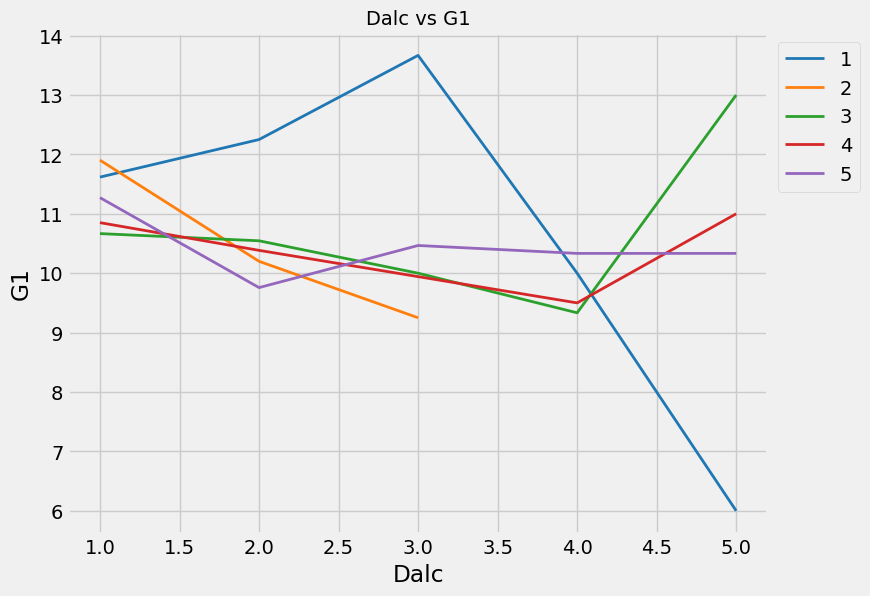

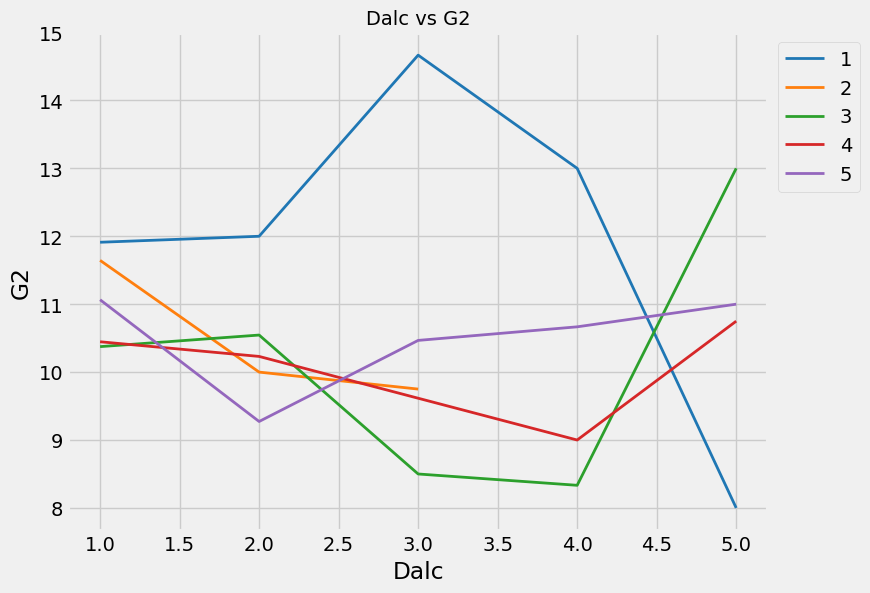

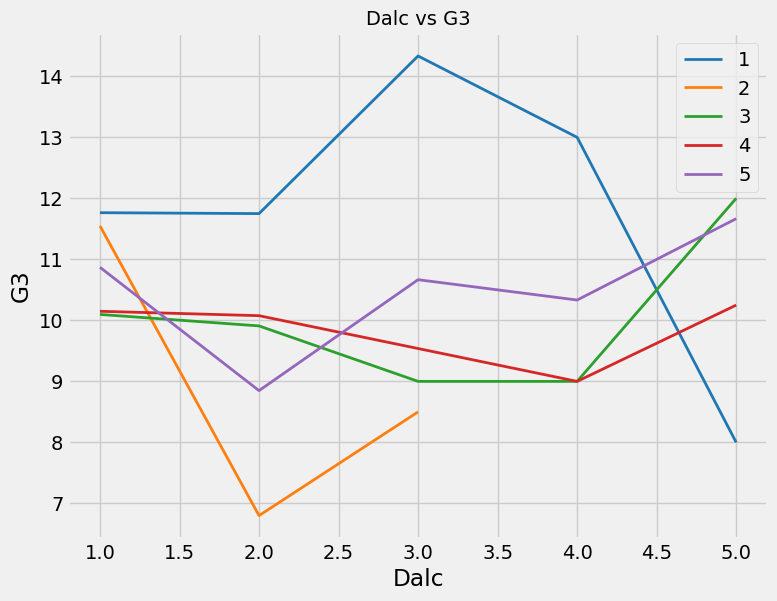

In [10]:
cols=['G1','G2','G3']

for i, col in enumerate(cols):
    fig = plt.figure()
    fig.set_size_inches(8,6)

    health = df.groupby(['Dalc','health'])[col].mean()
    health = health.reset_index('Dalc')

    sns.lineplot(x='Dalc', y=col, hue='health', data=health, palette='tab10', linewidth=2)

    plt.tight_layout()
    plt.title(f'Dalc vs {col}', fontsize=14)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

**Signification** :


1-Pour les étudiants ayant une santé importante (ce qui est bien), on observe généralement que leurs notes restent stables ou légèrement fluctuent en fonction des changements dans la consommation d'alcool. Cela signifie que même si ces étudiants consomment plus ou moins d'alcool, leurs performances académiques ne varient pas de manière significative.


2-En revanche, pour les étudiants ayant une santé basse (ce qui est mauvais), on constate que leurs notes ont tendance à diminuer à mesure que leur consommation d'alcool augmente. Cela suggère qu'il existe une corrélation négative entre la santé des étudiants et leur performance académique en présence d'une consommation d'alcool accrue.

# **Prétraitement des données du dataset**

# Affichage des informations a propos le dataset


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Suppression des lignes doublantes et des valeurs manquantes








In [12]:
def supprimer_doublons(data):
    print("1. Shape before removing duplicate: {}".format(data.shape))
    data = data.drop_duplicates()
    print("2. Shape after removing duplicate: {}".format(data.shape))
    return data

In [13]:
def supprimer_cols_avec_missing_data(data, min=50):
    percent_missing = data.isnull().sum() * 100 / len(data)
    print("1. % Avant Application Seuil Suppression: \n{}".format(percent_missing))

    data = data.dropna( axis=1, thresh = min)
    print("\n2. % Après Application Seuil Suppression: \n{}".format(data.isnull().sum() * 100 / len(data)))

    return data

In [14]:
data=supprimer_doublons(df)
data=supprimer_cols_avec_missing_data(df)

1. Shape before removing duplicate: (395, 33)
2. Shape after removing duplicate: (395, 33)
1. % Avant Application Seuil Suppression: 
school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

2. % Après Application Seuil Suppression: 
school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0

**Notre dataset ne contienne ni lignes dupliquées ni valeurs manquantes.**



# Convertir les strings aux numeriques

In [15]:
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [16]:
Data = FunLabelEncoder(df)
Data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,14,15,15


# Régression Linéaire

Après avoir prétraité notre dataset allons construire notre modèle d'apprentissage.
Dans le cadre de notre étude sur la prédiction des performances des élèves, nous avons opté sur l'utilisation de la régression linéaire en raison de sa simplicité et de son intérprétabilité.


1- **Division des données en ensembles d'entrainement et de test**

In [17]:
X = Data.drop('G3', axis = 1)
y = Data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2- **Entrainement du modèle de régression linéaire**

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

3- **Evaluation du modèle**

In [19]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.032394108866739


4- **Visualisation des prédictions par rapport aux valeurs réelles**

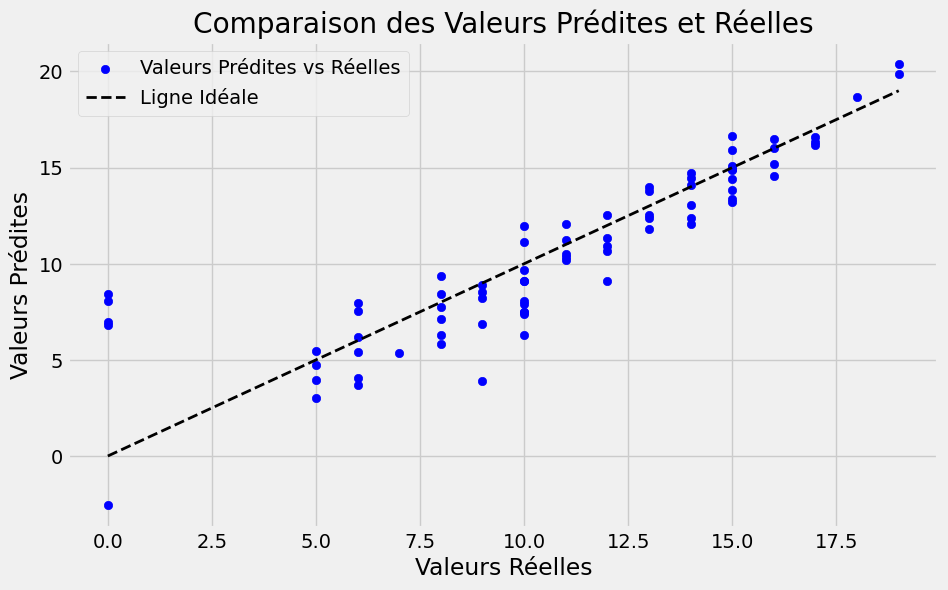

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Valeurs Prédites vs Réelles')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2, label='Ligne Idéale')
plt.title('Comparaison des Valeurs Prédites et Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.legend()
plt.grid(True)
plt.show()


# Algorithme K-NN

**1-Définir la plage de 'k' à explorer**

In [21]:
param_grid = {
    'n_neighbors': np.arange(1, 21, 2),  # Vérifier les nombres impairs de 1 à 20
    'weights': ['uniform', 'distance'],  # Tester à la fois les poids uniformes et basés sur la distance
}

**2-Initialiser GridSearchCV avec KNeighborsRegressor**

In [22]:
grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  #  Nous voulons minimiser le MSE
    n_jobs=-1,
)

3- **Ajuster la recherche en grille aux données d'entraînement**

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

4- **Obtenir le meilleur estimateur et ses paramètres**

In [24]:
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_neighbors': 11, 'weights': 'distance'}


5- **Prédire en utilisant le meilleur modèle KNN**

In [25]:
y_pred_knn = best_knn_model.predict(X_test)

6- **Calculer l'erreur quadratique moyenne pour le meilleur modèle KNN**

In [26]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error with Optimized KNN:", mse_knn)

Mean Squared Error with Optimized KNN: 4.242790592009263


7- **racé en dispersion pour visualiser les valeurs prédites par rapport aux valeurs réelles**

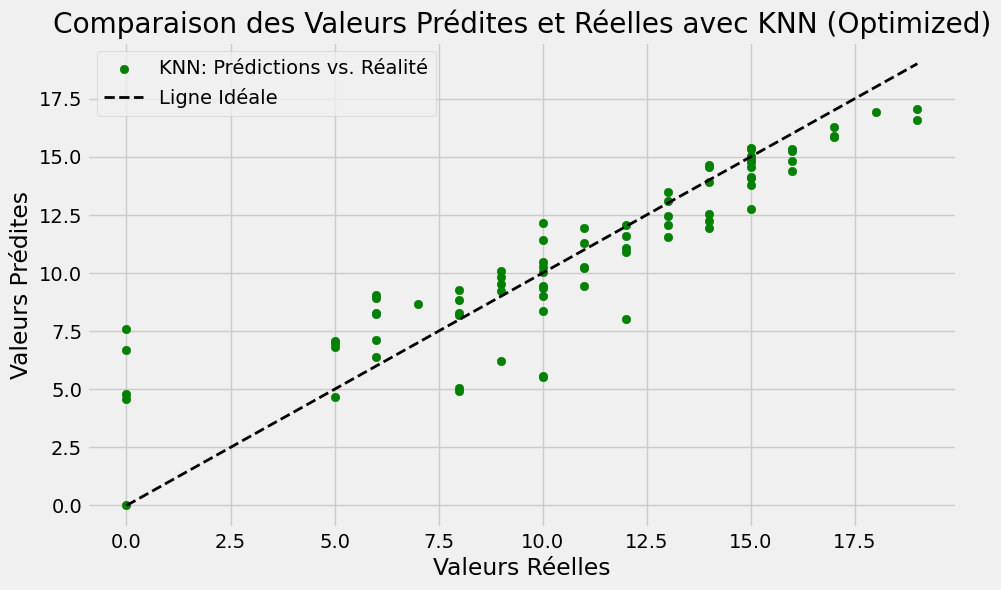

In [27]:
# Scatter plot to visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='green', label='KNN: Prédictions vs. Réalité')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2, label='Ligne Idéale')
plt.title('Comparaison des Valeurs Prédites et Réelles avec KNN (Optimized)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.legend()
plt.grid(True)
plt.show()

**Algorithme SVM**

Ici nous allons utiliser l'algorithme SVM qui offre une approche puissante et flexible pour prédire les performances des élèves en exploitant les relations complexes entre les caractéristiques individuelles et les résultats scolaires

Créant un objet de modèle SVM avec les paramètres par défaut

In [28]:
svm_model = SVR()

Entrainement du modèle SVM sur l ensemble d entrainement

In [29]:
svm_model.fit(X_train, y_train)

SVR()

Prédiction des valeurs cibles sur l ensemble de test

In [30]:
y_pred_svm = svm_model.predict(X_test)

Calcul de MSE pour évaluer les performances du modele

In [31]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error (SVM): ", mse_svm)

Mean Squared Error (SVM):  4.22533417101472


Visualisation des prédictions par rapport aux valeurs réelles

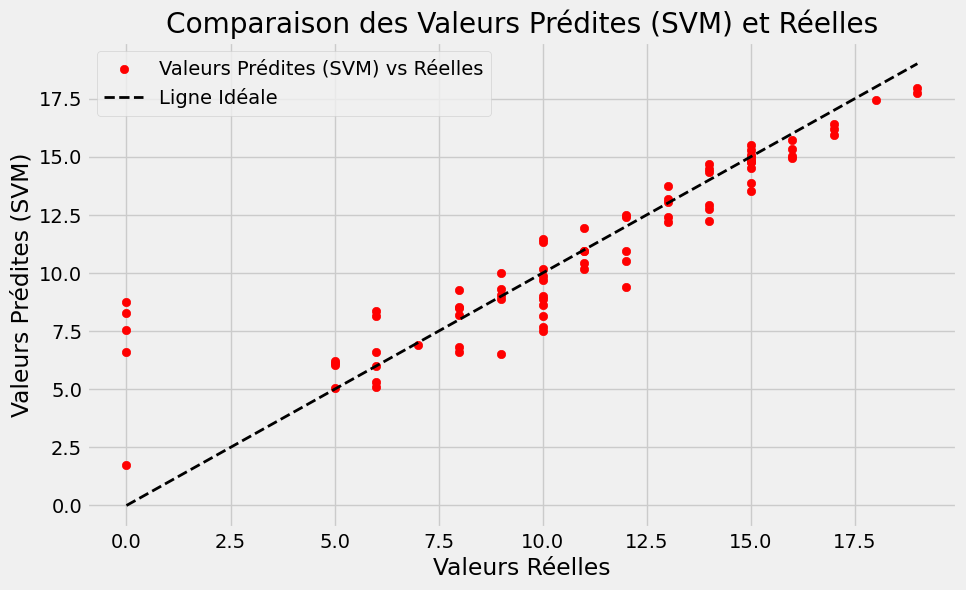

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, color='red', label='Valeurs Prédites (SVM) vs Réelles')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2, label='Ligne Idéale')
plt.title('Comparaison des Valeurs Prédites (SVM) et Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites (SVM)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation des performances des algorithmes de régression linéaire et des k plus proches voisins (KNN) et comparaison des deux approches

# Définition des métriques à évaluer

In [ ]:
from sklearn.model_selection import cross_validate
scoring = {'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error', 'neg_mean_absolute_error': 'neg_mean_absolute_error'}


# Évaluation de la régression linéaire avec cross-validation

In [ ]:
scores_linear = cross_validate(model, X, y, cv=5, scoring=scoring)

# Évaluation de KNN avec cross-validation

In [ ]:
scores_knn = cross_validate(best_knn_model, X, y, cv=5, scoring=scoring)

# Affichage des résultats

In [ ]:
print("Régression Linéaire:")
for metric, scores in scores_linear.items():
    print(f"{metric}: {scores.mean()} (+/- {scores.std()})")

print("\nKNN:")
for metric, scores in scores_knn.items():
    print(f"{metric}: {scores.mean()} (+/- {scores.std()})")

Régression Linéaire:
fit_time: 0.006705093383789063 (+/- 0.0012733304728201411)
score_time: 0.003804922103881836 (+/- 0.00010209895328424264)
test_r2: 0.7930154807697392 (+/- 0.0586119676981202)
test_neg_mean_squared_error: -4.132014856525436 (+/- 1.5729568625756463)
test_neg_mean_absolute_error: -1.325742160771377 (+/- 0.13245068932843304)

KNN:
fit_time: 0.00930647850036621 (+/- 0.004235715331875158)
score_time: 0.009879398345947265 (+/- 0.0025751238601469614)
test_r2: 0.8008081176353473 (+/- 0.05096807989658531)
test_neg_mean_squared_error: -3.921008033086909 (+/- 1.2334751233304182)
test_neg_mean_absolute_error: -1.3497052716176303 (+/- 0.18116384344320832)


Pour la régression linéaire, les performances moyennes des différentes métriques sont les suivantes :

- Temps de fit : 0.0067 secondes (± 0.0013)
- Temps de score : 0.0038 secondes (± 0.0001)
- R² moyen : 0.7930 (± 0.0586)
- Erreur quadratique moyenne négative (MSE) : -4.1320 (± 1.5730)
- Erreur absolue moyenne négative (MAE) : -1.3257 (± 0.1325)

Pour le modèle KNN, les performances moyennes sont les suivantes :

- Temps de fit : 0.0093 secondes (± 0.0042)
- Temps de score : 0.0099 secondes (± 0.0026)
- R² moyen : 0.8008 (± 0.0510)
- Erreur quadratique moyenne négative (MSE) : -3.9210 (± 1.2335)
- Erreur absolue moyenne négative (MAE) : -1.3497 (± 0.1812)

En comparant les deux modèles, nous pouvons constater que le modèle KNN présente une légère amélioration du coefficient de détermination (R²) par rapport à la régression linéaire. De plus, le modèle KNN a une légère réduction de l'erreur quadratique moyenne (MSE) et de l'erreur absolue moyenne (MAE) par rapport à la régression linéaire.

Ces résultats suggèrent que le modèle KNN peut être plus approprié pour ce problème de prédiction par rapport à la régression linéaire, en raison de ses performances légèrement meilleures sur plusieurs métriques.